#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSDP.05 Computing Magnitude and Phase</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 3</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

unknownmagnitude16 = 14
unknownfrequency16 = 2
unknownphase16 =np.pi/4
unknownmagnitude17 = 10
unknownfrequency17 = 4
unknownphase17 = 0
unknownmagnitude18 = 8
unknownfrequency18 = 3
unknownphase18 =np.pi/6
unknownmagnitude19 = 5
unknownfrequency19 = 1
unknownphase19 =np.pi/2
unknownmagnitude20 = 7
unknownfrequency20 = 1
unknownphase20 =np.pi/2
unknownmagnitude21 = 10
unknownfrequency21 = 2
unknownphase21 = 0
unknownmagnitude22 = 8
unknownfrequency22 = 3
unknownphase22 =np.pi/5
unknownmagnitude23 = 5
unknownfrequency23 = 4
unknownphase23 =np.pi/2


## <font color=red>DSP.05.G3) Spatial Patterns: Multiplying Sine Waves of the Same Frequency but Different Phase</font>

### <font color=red>DSP.05.G3.a) Multiplying Sine Waves to Create a Spatial Series</font>

Here is a spatial pattern with a 15-cycle-per-meter frequency in one direction and a 3-cycle-per-meter
frequency in the other direction.

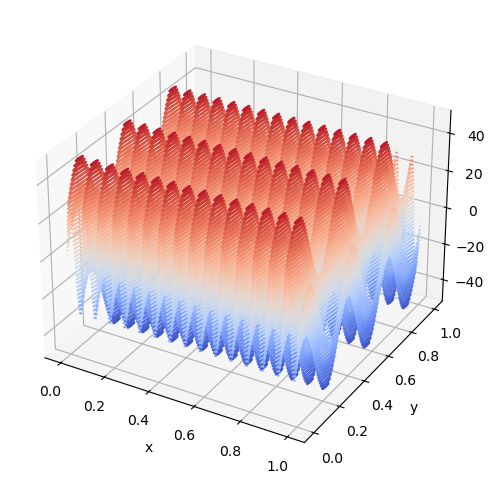

In [2]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = 30 * np.sin(2*np.pi * 15 * X) +  20 * np.sin(2*np.pi * 3 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

Count 15 peaks in one direction and 3 peaks in the other direction.

Here is the same spatial pattern from a different angle - a view with the x axis facing us.

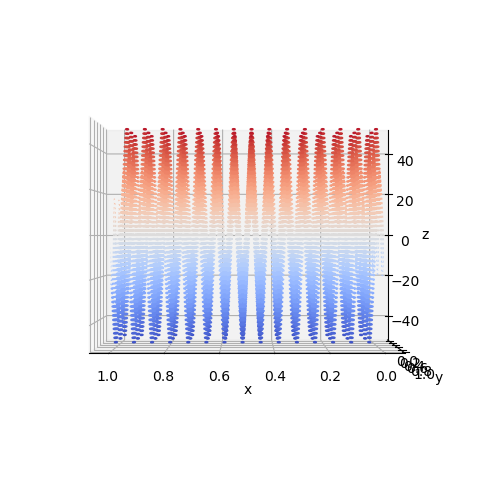

In [3]:
ax.view_init(0, 90)
fig

There’s a 15-cycle-per-meter spatial pattern in the x direction. Note that the spatial pattern oscillates
above and below the zero line.

Here is the same spatial pattern from a different angle - a view with the y axis facing us.

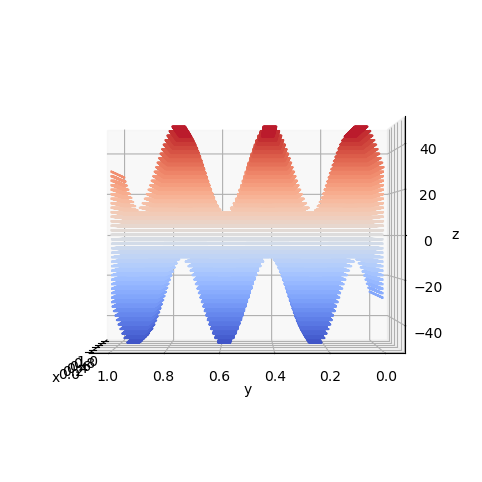

In [4]:
ax.view_init(0, 180)
fig

A clear 3-cycle-per-meter spatial pattern in the y direction. Note that the spatial pattern oscillates
above and below the zero line.

We know what happens when we multiply two sine-wave timeseries of the same frequency. Take a look
at what happens in the spatial domain.

In contrast to the 1D temporal patterns we worked with earlier, this is a 2D spatial pattern. So, we need to multiply the 15-cycle-per-meter pattern with a 15-cycle-per-
meter sine wave and the 3-cycle-per-meter pattern with a 3-cycle-per-meter sine wave.

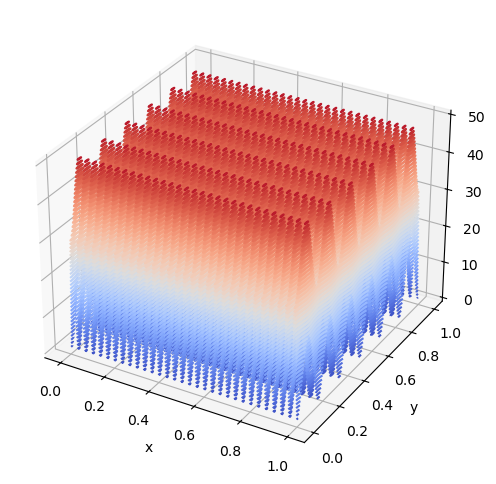

In [5]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = 30 * np.sin(2*np.pi * 15 * X) * np.sin(2*np.pi * 15 * X) +  20*np.sin(2*np.pi * 3 * Y) * np.sin(2*np.pi * 3 * Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

What is this?

Here is the same spatial pattern from a different angle - a view with the x axis facing us.

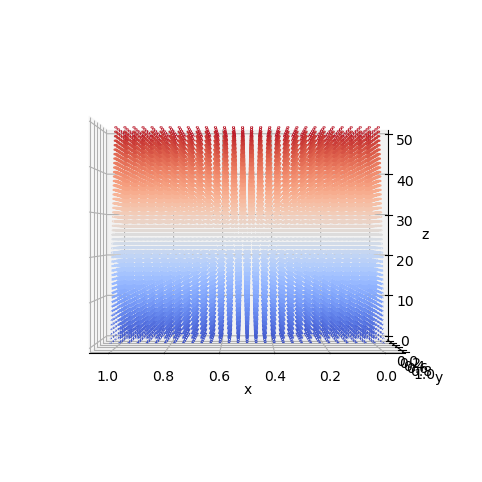

In [6]:
ax.view_init(0, 90)
fig

All activity is above the zero line. Why? Also...although the magnitude values are provided in the functions
above, multiply each frequency by a sine wave of the same frequency and calculate the magnitude
of activity in each direction. [#Miller Are the magnitudes correct? The squared peaks look about the same as the unsquared peaks. OTOH, the gain multiplier is applied just once. So I think things are correct: 20 x 1 x 1. If I've got this right, is that worth spelling out here?]

### <font color=red>DSP.05.G3.b) Probing a Spatial Pattern</font>

Here is a spatial pattern composed of two unknown sine waves (in both the x and y directions). Find the
frequencies (and their associated magnitude and phase values) using a method of your choice. Create a
plot comparing the original and the estimated spatial pattern to document that your calculations were
correct.

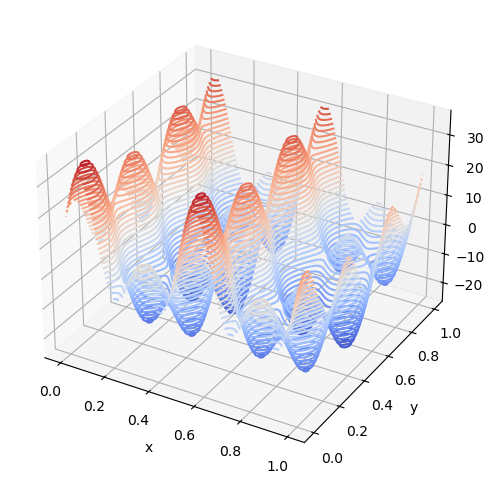

In [7]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = unknownmagnitude16 * np.sin(2*np.pi * unknownfrequency16 * X+unknownphase16) +\
unknownmagnitude17 * np.sin(2*np.pi * unknownfrequency17 * X)+\
unknownmagnitude18 * np.sin(2*np.pi * unknownfrequency18 * Y+\
unknownphase18)+unknownmagnitude19 * np.sin(2*np.pi * unknownfrequency19 * Y+unknownphase19)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)

### <font color=red>DSP.05.G3.c) Probing a Spatial Pattern</font>

Here is a spatial pattern composed of two unknown sine waves (in both the x and y directions). Find the
frequencies (and their associated magnitudes and phase values) using a method of your choice. Create a
plot comparing the original and the estimated spatial pattern to document that your calculations were
correct.

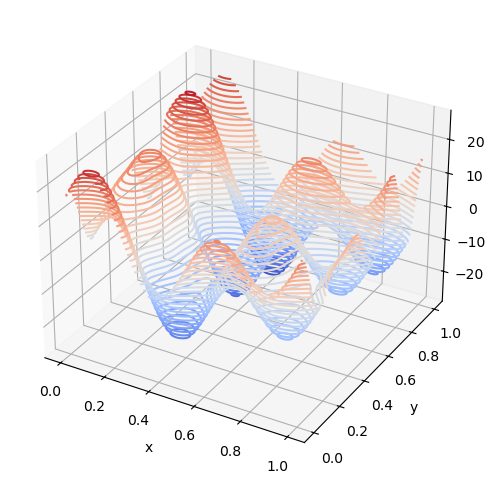

In [8]:
x = np.arange(0,1, 0.001)
y = np.arange(0,1, 0.001)
X, Y = np.meshgrid(x, y)
Z = unknownmagnitude20 * np.sin(2*np.pi * unknownfrequency20 * X+unknownphase20) +\
unknownmagnitude21 * np.sin(2*np.pi * unknownfrequency21 * X)+\
unknownmagnitude22 * np.sin(2*np.pi * unknownfrequency22 * Y+unknownphase22)+\
unknownmagnitude23 * np.sin(2*np.pi * unknownfrequency23 * Y+unknownphase23)

fig = plt.figure()
ax = plt.axes(projection='3d')
make_plot_3d(ax,X,Y,Z)